# CLIP

CLIP (Contrastive Language–Image Pretraining) is a model developed by OpenAI that connects vision and language. It is trained on a large amount of publicly available internet text paired with images. The model learns to understand and generate meaningful representations from both images and text, making it capable of zero-shot transfer across a range of tasks.

### Environment: imports and device

In [1]:
# Imports
import torch
import clip
from PIL import Image
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from CLIP import classify

# device
device = "cpu"                                  # "cuda" if torch.cuda.is_available() else "cpu"

/home/andrea/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Model load
In this notebook, we are using the `ViT-B/32` version of the CLIP model. ViT-B/32 stands for Vision Transformer Base with a patch size of 32. The Vision Transformer is a model architecture that treats an image as a sequence of patches and applies transformer layers to understand the image. The ‘Base’ version of the model has a balance between size and performance, making it a good choice for many applications. Other versions of the model include `ViT-L/14` which is larger and potentially more accurate but also more computationally intensive.

In [2]:
model, preprocess = clip.load("ViT-B/32", device=device)

## MNIST
The MNIST (Modified National Institute of Standards and Technology) dataset is a large database of handwritten digits that is commonly used for training various image processing systems. The dataset contains 70,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images. 

The 10 different classes represent the digits from 0 to 9. Each class is represented by thousands of 28x28 pixel grayscale images of handwritten digits.


In [9]:
labels = list(range(10))
labels = [str(i) for i in labels]
text = clip.tokenize(labels).to(device) 

# MINST is grayscale and CLIP was trained with RGB images so we need to refactor the data
    # transforms.Lambda(lambda x: x.repeat(3, 1, 1)),

# transform = transforms.Compose([
#     transforms.Resize((224, 224)), 
#     transforms.Grayscale(num_output_channels=3),
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

dataset = datasets.MNIST(
    root='../../data',
    train=False,
    download=True,
    transform=preprocess
)

dataloader = DataLoader(dataset, batch_size=32, shuffle=False)

## Classification

The `classify` function is used to perform zero-shot classification on the images from the CIFAR-10 dataset using the CLIP model. The function takes as input the CLIP model, the text representations of the classes, and the dataloader for the images.

The function works by iterating over the images in the dataloader and computing the image features using the CLIP model. It also computes the text features for the class labels. It then computes the similarity between the image features and text features using the dot product, which gives a measure of how similar each image is to each class label.

The softmax function is applied to these similarity scores to convert them into probabilities, and the class with the highest probability is chosen as the prediction for each image. The function returns two lists: the true labels of the images and the predicted labels.

This approach leverages the ability of the CLIP model to understand and generate meaningful representations from both images and text, enabling it to perform zero-shot classification without having been specifically trained on the CIFAR-10 classes.

In [4]:
## Labels Calculation
true_labels, predicted_labels = classify(model, text, dataloader, "minst")

# true_labels = np.load(    'results/true_labels-minst.npy')
# predicted_labels = np.load('results/predicted_labels-minst.npy')

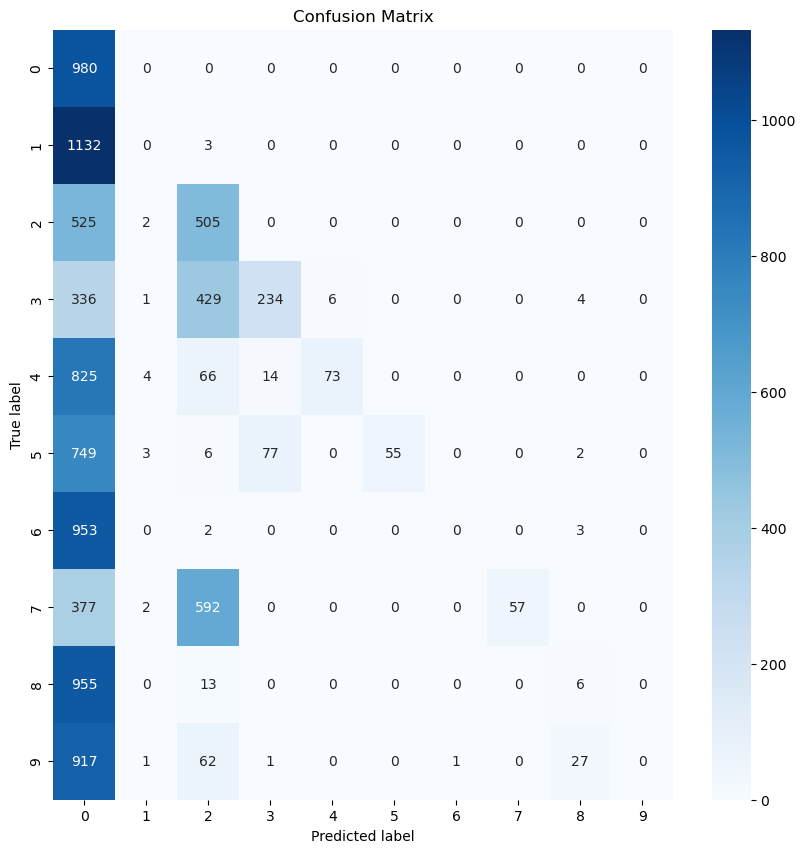

In [7]:
confusion_mat = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [10]:
print(classification_report(true_labels, predicted_labels, target_names=labels))


              precision    recall  f1-score   support

           0       0.13      1.00      0.22       980
           1       0.00      0.00      0.00      1135
           2       0.30      0.49      0.37      1032
           3       0.72      0.23      0.35      1010
           4       0.92      0.07      0.14       982
           5       1.00      0.06      0.12       892
           6       0.00      0.00      0.00       958
           7       1.00      0.06      0.11      1028
           8       0.14      0.01      0.01       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.19     10000
   macro avg       0.42      0.19      0.13     10000
weighted avg       0.41      0.19      0.13     10000



/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrea/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
